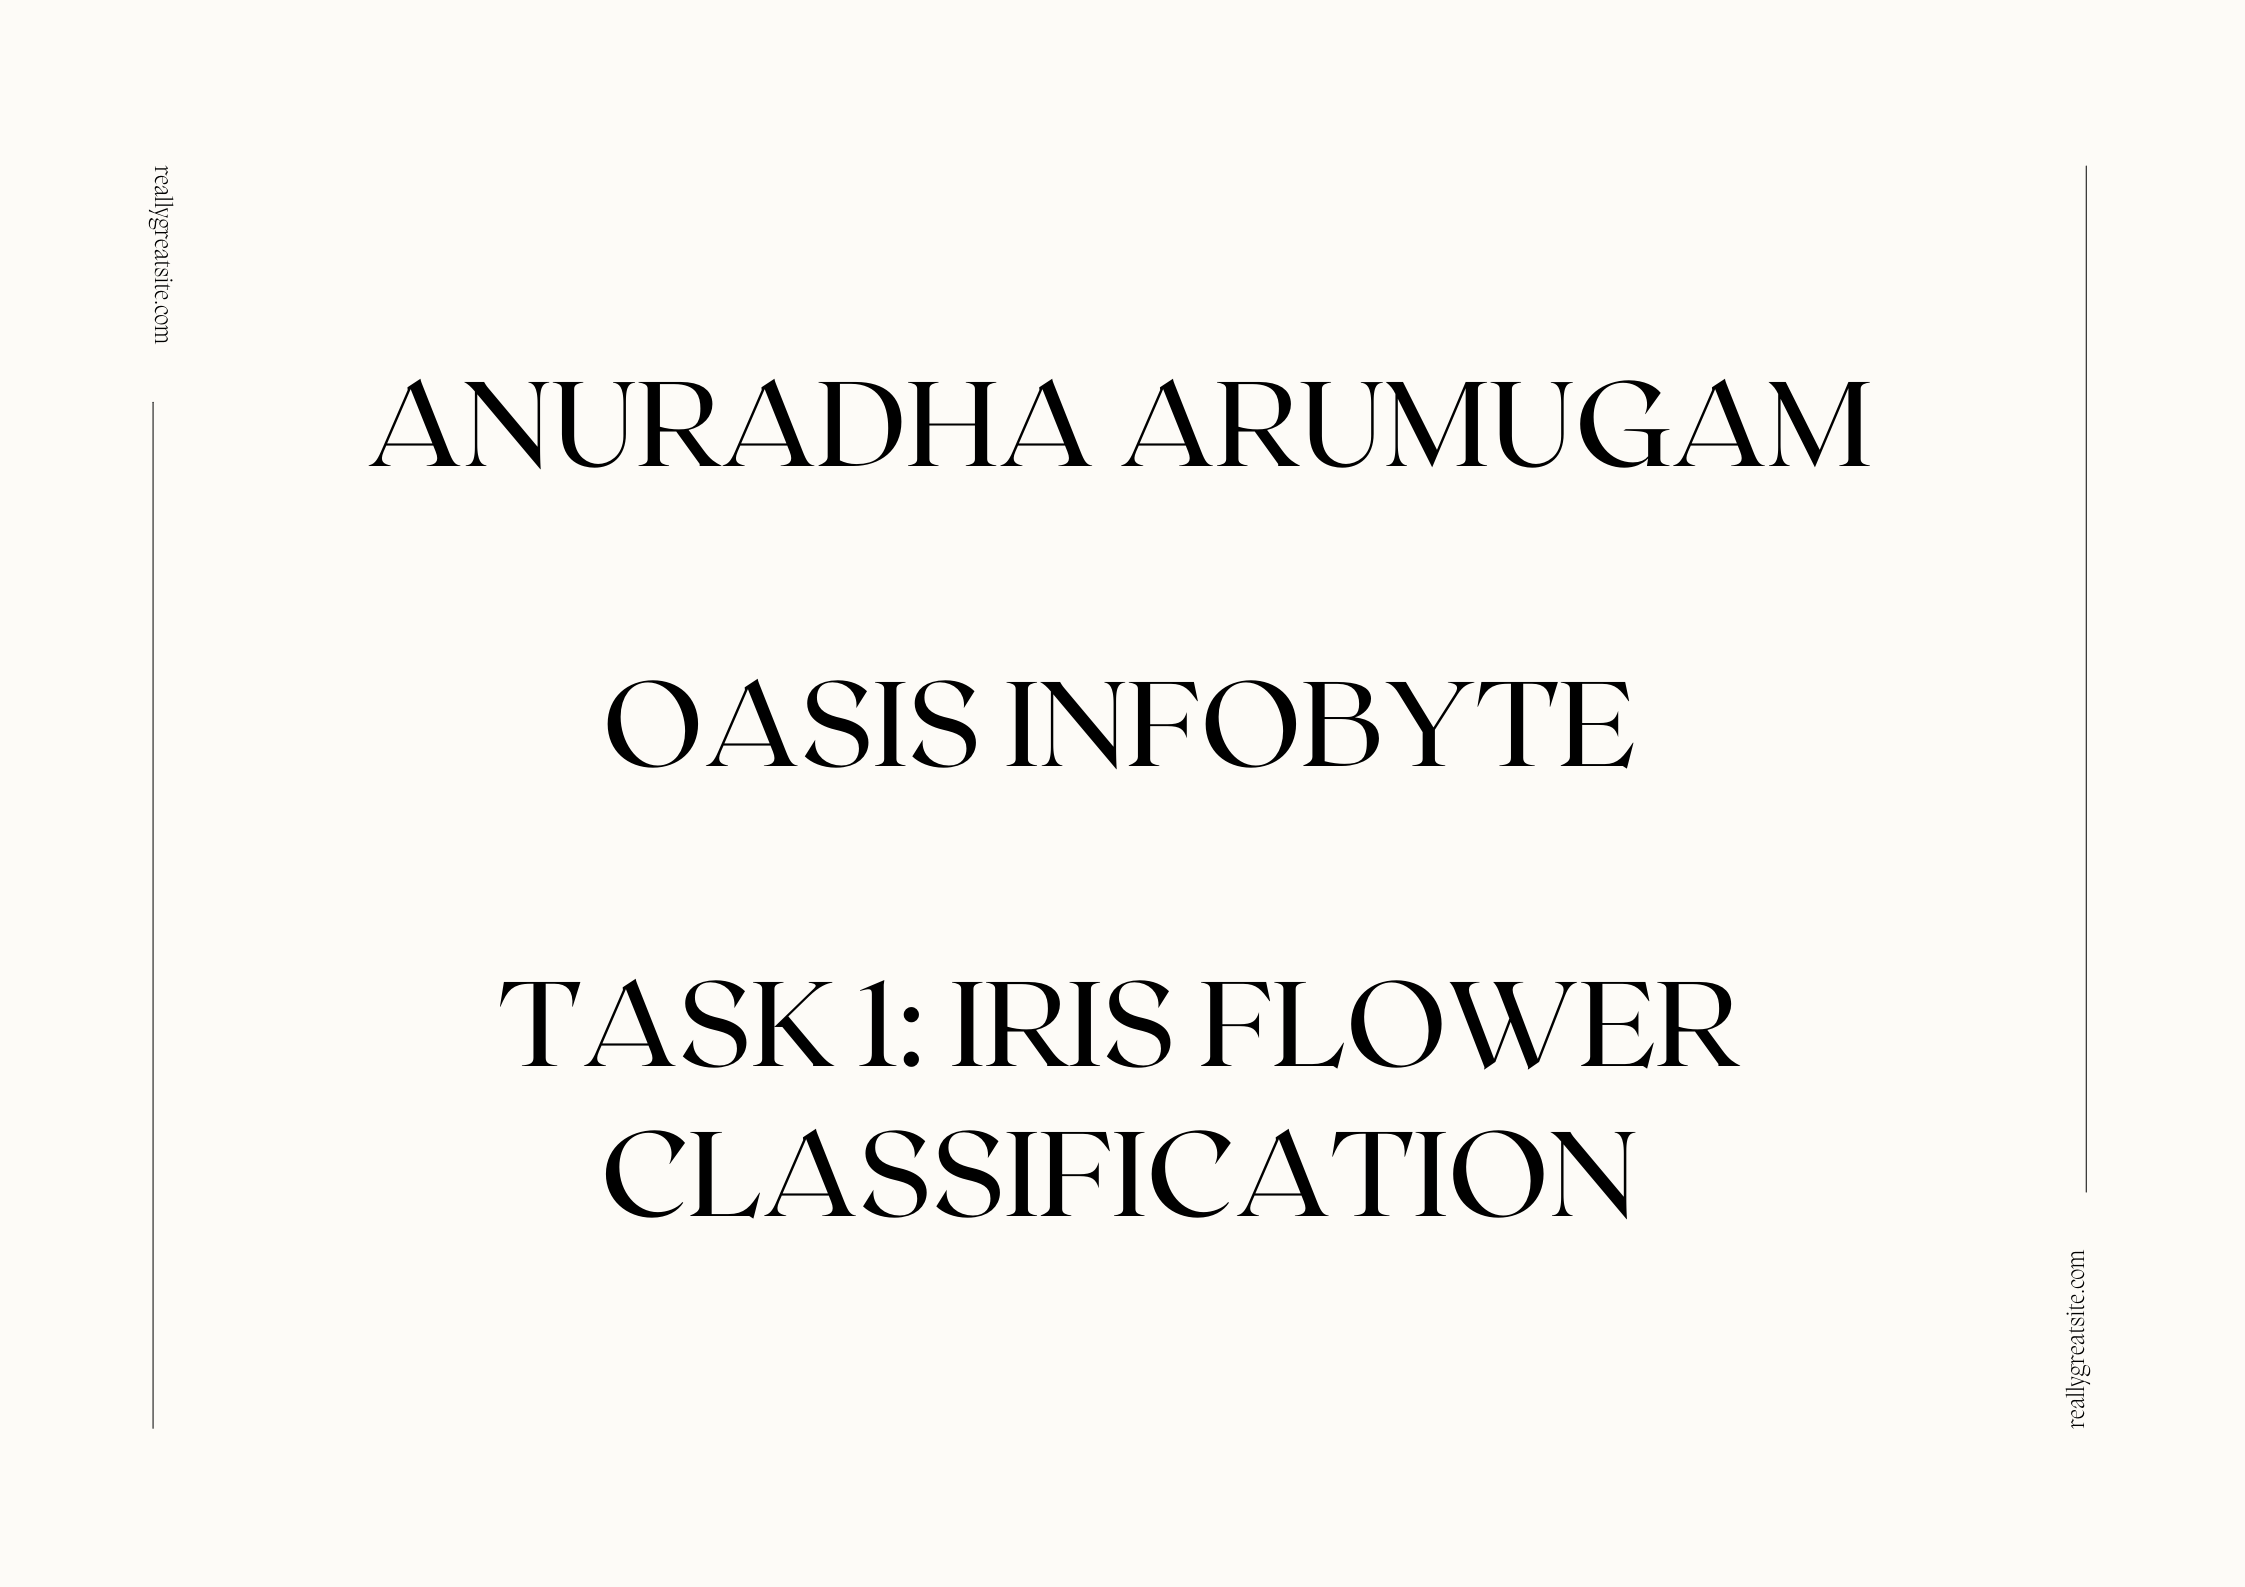

In [1]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

Importing necessary libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [12]:
import seaborn as sns

Importing Data Set:

In [11]:
df=pd.read_csv("/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking for Null values

In [42]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Visualisation

<ipython-input-18-549b1ccb9e62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

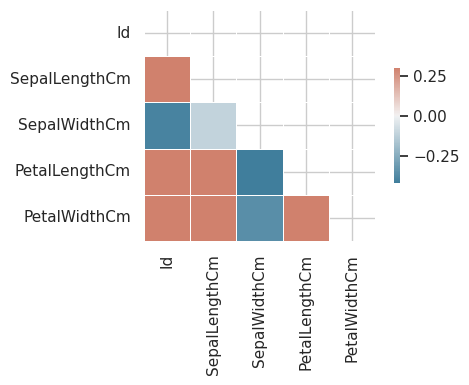

In [18]:
# Computing the correlation matrix
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(5, 3))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<ipython-input-17-3497ec5f085c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr().stack().reset_index(name="correlation")
<ipython-input-17-3497ec5f085c>:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for artist in g.legend.legendHandles:


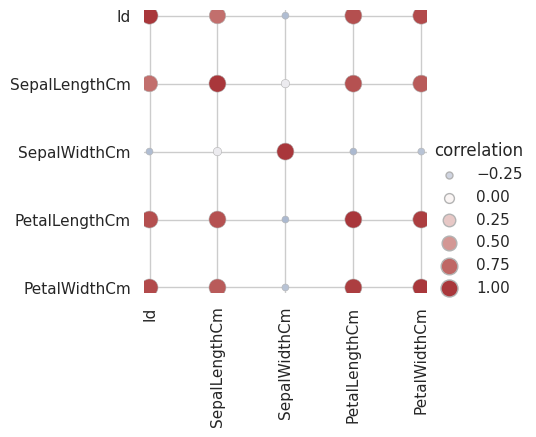

In [17]:
sns.set_theme(style="whitegrid")
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=5, sizes=(25, 150), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [23]:
species=[]
for i in df[Species]:
    if i not in species:
      species.append(i)

print(species)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [30]:
header=[]
for col in df:
    header.append(col)
print(header)
header.pop()
print(header)
header.remove('Id')
print(header)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [40]:
df1=df
df1=df1.drop(['Id'],axis=1)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


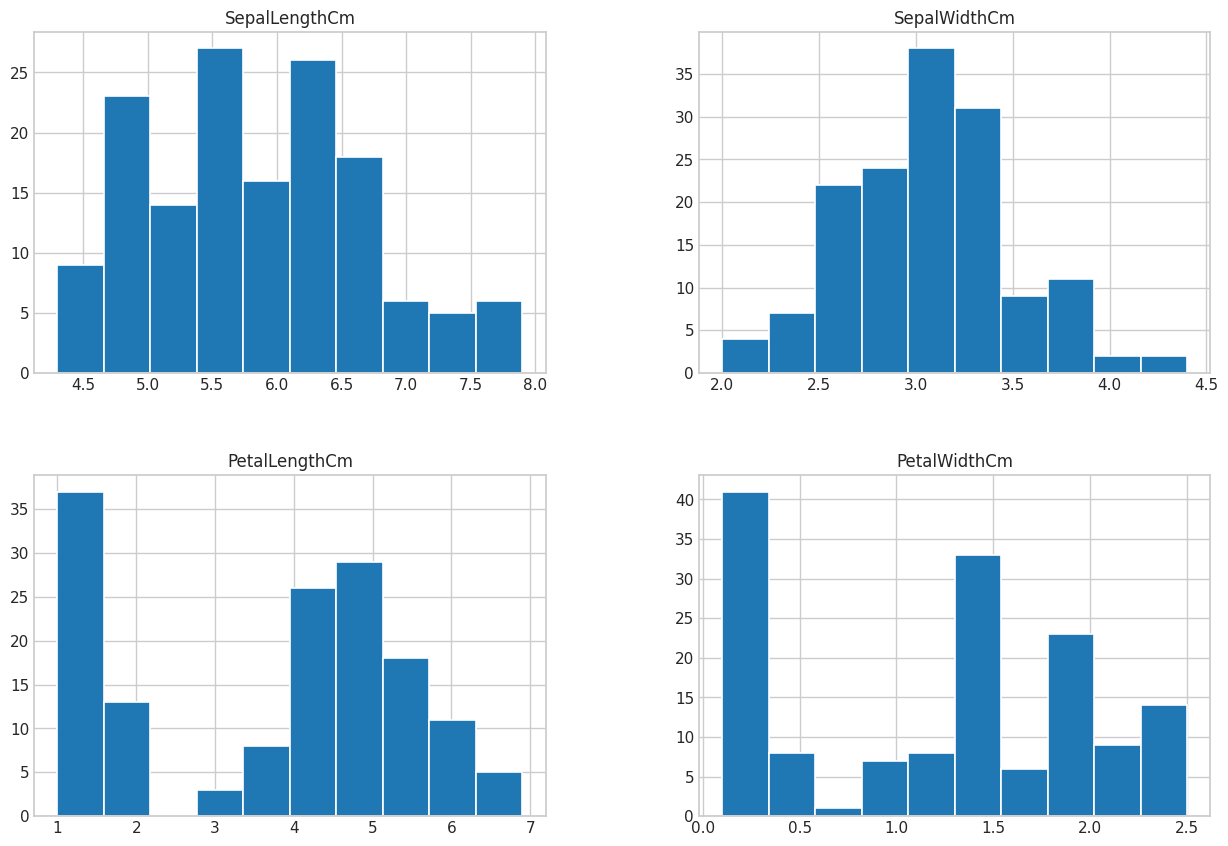

In [55]:
df1.hist(linewidth=1.2,figsize=(12,8));
plt.show();

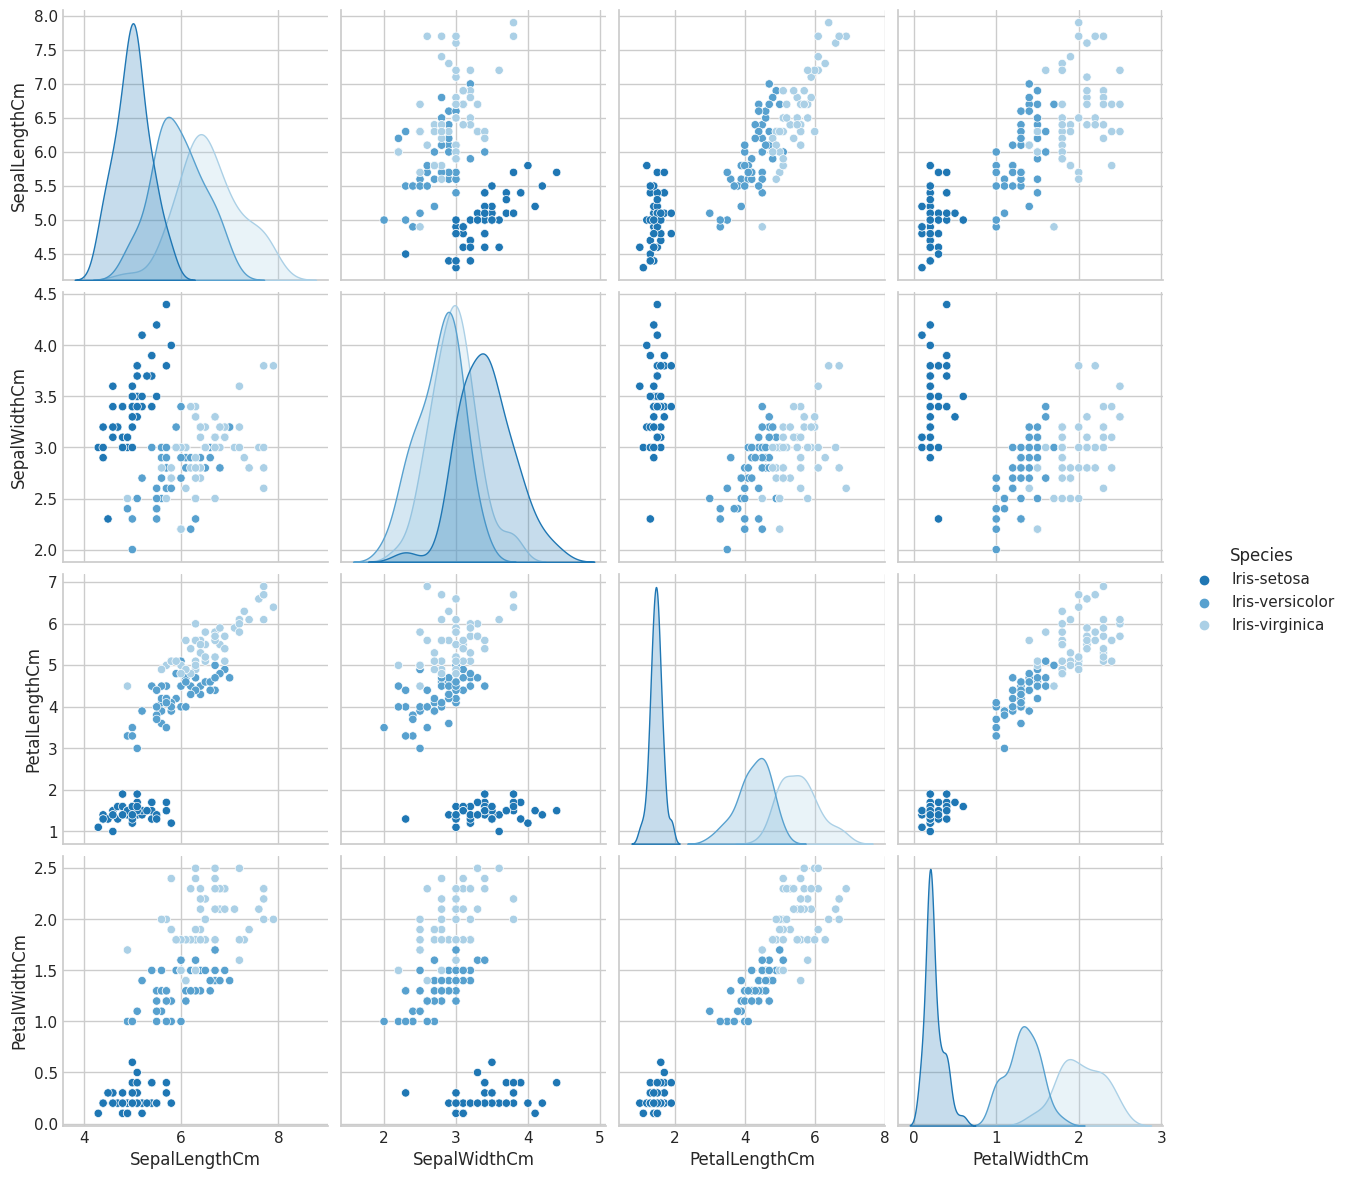

In [52]:
sns.pairplot(df1,hue='Species',height=3,aspect=1)

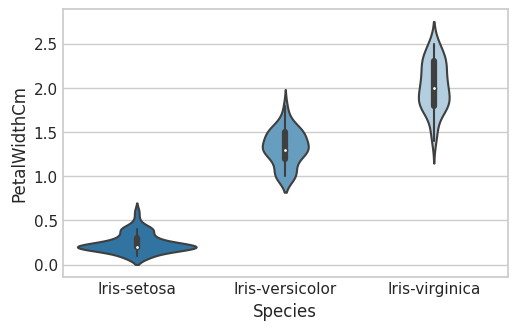

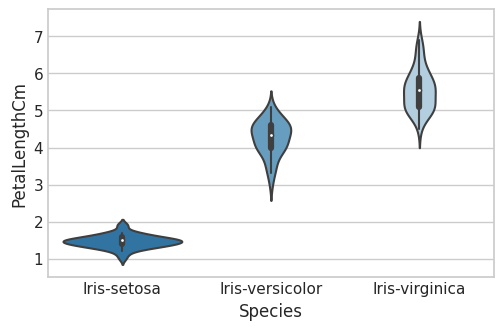

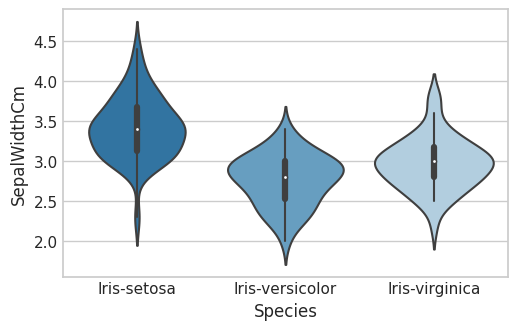

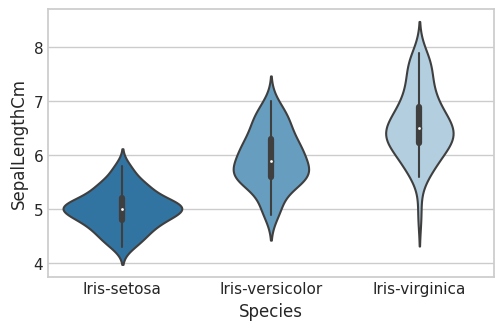

In [66]:
plt.figure(figsize=(10,6));
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.show()
plt.figure(figsize=(10,6));
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.show()
plt.figure(figsize=(10,6));
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.show()
plt.figure(figsize=(10,6));
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.show()

<Axes: >

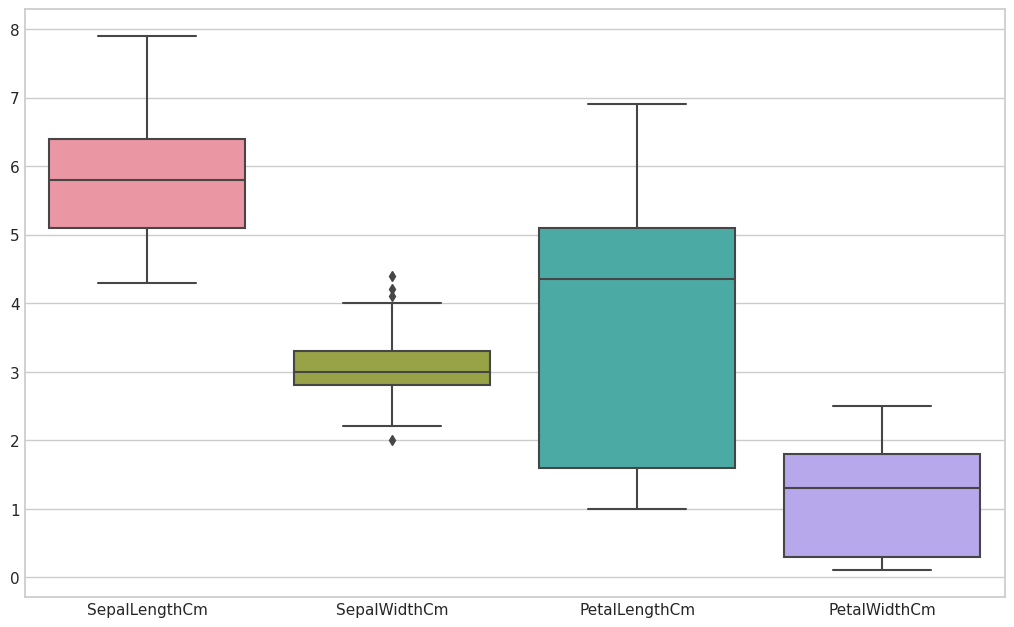

In [68]:
plt.figure(figsize=(10,6));
sns.boxplot(df1)

In [75]:
x=df1.iloc[:,:4]
y=df1.iloc[:,4]
print(x.head)
print(y.head)

<bound method NDFrame.head of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]>
<bound method NDFrame.head of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgi

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.37


Applying the same dataset on ensemble mode to compare the accuracy

In [88]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(oob_score=True)
RandomForest.fit(x_train,y_train)
print("Accuracy of the model is {:.2f}".format(RandomForest.oob_score_*100))

Accuracy of the model is 95.54


Prefering Logistic Regression Model over Random Forest Classifier